<a href="https://colab.research.google.com/github/pat-weber/study-projects/blob/main/AED_Instacart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Análise exploratória de dados da plataforma Instacart

# Objetivo

A Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido de supermercado e receber a compra em casa, semelhante ao funcionamento do Uber Eats e do iFood.



## Base de dados

Há cinco tabelas no conjunto de dados, abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número de identificação unívoco de cada pedido
    - `'user_id'`: é o número de identificação unívoco da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto unívoco que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    - `'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número de identificação unívoco de cada pedido
    -	`'product_id'`: é o número de identificação unívoco de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    -	`'aisle'`: é o nome da seção



-	`departments.csv`
    -	`'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Análise dos dados

In [2]:
# Importação de bibliotecas.

import pandas as pd
from matplotlib import pyplot as plt



In [4]:
# Leitura dos dataframes.

df_orders = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/datasets/instacart_orders.csv')
df_products = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/datasets/products.csv')
df_aisles = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/datasets/aisles.csv')
df_departments = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/datasets/departments.csv')
df_order_products = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/order_products.csv.zip')


In [5]:
# Informações do dataframe de pedidos.

df_orders.info()
print()
print(df_orders.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 1 columns):
 #   Column                                                                            Non-Null Count   Dtype 
---  ------                                                                            --------------   ----- 
 0   order_id;user_id;order_number;order_dow;order_hour_of_day;days_since_prior_order  478967 non-null  object
dtypes: object(1)
memory usage: 3.7+ MB

  order_id;user_id;order_number;order_dow;order_hour_of_day;days_since_prior_order
0                        1515936;183418;11;6;13;30.0                              
1                          1690866;163593;5;5;12;9.0                              
2                           1454967;39980;4;5;19;2.0                              
3                         1768857;82516;56;0;20;10.0                              
4                         3007858;196724;2;4;12;17.0                              


In [6]:
# Informações do dataframe de produtos.

df_products.info()
print()
print(df_products.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 1 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   product_id;product_name;aisle_id;department_id  49694 non-null  object
dtypes: object(1)
memory usage: 388.4+ KB

      product_id;product_name;aisle_id;department_id
0                 1;Chocolate Sandwich Cookies;61;19
1                          2;All-Seasons Salt;104;13
2        3;Robust Golden Unsweetened Oolong Tea;94;7
3  4;Smart Ones Classic Favorites Mini Rigatoni W...
4                   5;Green Chile Anytime Sauce;5;13


In [7]:
# Informações do dataframe de seções

df_aisles.info()
print()
print(df_aisles.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   aisle_id;aisle  134 non-null    object
dtypes: object(1)
memory usage: 1.2+ KB

                 aisle_id;aisle
0       1;prepared soups salads
1           2;specialty cheeses
2         3;energy granola bars
3               4;instant foods
4  5;marinades meat preparation


In [8]:
# Informações do datafame de departamentos.

df_departments.info()
print()
print(df_departments.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 1 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   department_id;department  21 non-null     object
dtypes: object(1)
memory usage: 296.0+ bytes

  department_id;department
0                 1;frozen
1                  2;other
2                 3;bakery
3                4;produce
4                5;alcohol


In [9]:
# Informações do dataframe de itens em cada pedido.

df_order_products.info()
print()
print(df_order_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 1 columns):
 #   Column                                           Dtype 
---  ------                                           ----- 
 0   order_id;product_id;add_to_cart_order;reordered  object
dtypes: object(1)
memory usage: 34.7+ MB

  order_id;product_id;add_to_cart_order;reordered
0                            2141543;11440;17.0;0
1                               567889;1560;1.0;1
2                             2261212;26683;1.0;1
3                              491251;8670;35.0;1
4                              2571142;1940;5.0;1


**Comentário**

Os arquivos lidos têm os valores separados por ";". Para melhor visualização dos dados vamos reler os dataframes passando o parâmetro sep=';'. Assim teremos nossos dados alinhados nas colunas.

In [11]:
# Leitura dos dataframes passando como argumento o separador ";" e decimal em ponto.

df_orders = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/datasets/instacart_orders.csv', sep = ';', decimal = '.')
df_products = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/datasets/products.csv', sep = ';', decimal = '.')
df_aisles = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/datasets/aisles.csv', sep = ';', decimal = '.')
df_departments = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/datasets/departments.csv', sep = ';', decimal = '.')
df_order_products = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/new-markets/Data_Refactored_2_sprint/order_products.csv.zip', sep = ';', decimal = '.')


In [12]:
# Informações do dataframe de pedidos.

df_orders.info()
print()
print(df_orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12  

In [13]:
# Informações do dataframe de produtos.

df_products.info()
print()
print(df_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13  


In [14]:
# Informações do dataframe de seções.

df_aisles.info()
print()
print(df_aisles.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB

   aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation


In [15]:
# Informações do dataframe de departamentos.

df_departments.info()
print()
print(df_departments.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes

   department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol


In [16]:
# Informações do dataframe de itens por pedido.

df_order_products.info()
print()
print(df_order_products.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440               17.0          0
1    567889        1560                1.0          1
2   2261212       26683                1.0          1
3    491251        8670               35.0          1
4   2571142        1940                5.0          1


### DataFrame `orders`

In [17]:
 # Verificando se há pedidos duplicados

print(df_orders.duplicated().sum())
print()
mask_duplicated = df_orders.duplicated(subset=['order_id'], keep=False)

orders_duplicated = df_orders[mask_duplicated].sort_values(by='order_id')

print(orders_duplicated)





15

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
354993    391768    57671            19          3                  2   
371905    391768    57671            19          3                  2   
119251    408114    68324             4          3                  2   
321100    408114    68324             4          3                  2   
394347    467134    63189            21          3                  2   
250626    467134    63189            21          3                  2   
99462     794638    50898            24          3                  2   
145574    794638    50898            24          3                  2   
311713   1021560    53767             3          3                  2   
242618   1021560    53767             3          3                  2   
164581   1112182   202304            84          3                  2   
273805   1112182   202304            84          3                  2   
314427   1286742   183220            48        

São 15 pedidos duplicados, o dia da semana e hora de todos eles são os mesmos.

In [18]:
# Verificando todos pedidos feitos na quarta feira, às 2h.


df_orders_filtered = df_orders[(df_orders['order_dow'] == 3) & (df_orders['order_hour_of_day'] == 2)]

print(df_orders_filtered)



        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

>Às 2 horas da quarta feira ocorreram 121 pedidos, no entanto, sabemos já que 15 são duplicados.

In [19]:
# Removendo pedidos duplicados

df_orders = df_orders.drop_duplicates(subset='order_id')

print(df_orders)



        order_id  user_id  order_number  order_dow  order_hour_of_day  \
0        1515936   183418            11          6                 13   
1        1690866   163593             5          5                 12   
2        1454967    39980             4          5                 19   
3        1768857    82516            56          0                 20   
4        3007858   196724             2          4                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
0                         30.0  
1                          9.0  
2                       

In [20]:
# Verificando as linhas duplicadas mais uma vez

print(df_orders.duplicated().sum())


0


In [21]:
# Verificando apenas os IDs de pedidos duplicados

print(df_orders['order_id'].value_counts())


order_id
1515936    1
2365274    1
336622     1
684027     1
1115132    1
          ..
2578130    1
1034057    1
597364     1
2142471    1
2071924    1
Name: count, Length: 478952, dtype: int64


>Eliminamos dados duplicados que provavelmente surgiram por um erro do sistema em determinada hora de um dia.

### DataFrame `products`

In [23]:
# Verificando se há linhas completamente duplicadas

df_products_duplicated = df_products.duplicated().sum()

print(df_products_duplicated)


0


In [28]:
# Verificando apenas se há IDs de departamentos duplicados

department_id = df_products['department_id'].value_counts()
department_id = department_id.duplicated()

print(department_id)


department_id
11    False
19    False
13    False
7     False
1     False
16    False
17    False
15    False
9     False
4     False
3     False
20    False
21    False
6     False
14    False
18    False
5     False
8     False
12    False
2     False
10    False
Name: count, dtype: bool


In [29]:
# Padronizando os nomes dos produtos


df_products['product_name'] = df_products['product_name'].str.lower()

print(df_products['product_name'].value_counts(ascending=False))


product_name
green tea with ginseng and honey                                        3
carrot and celery sticks                                                2
apricot energy bar                                                      2
top the tater chive & onion sour cream                                  2
proactive health indoor weight & hairball care with chicken cat food    2
                                                                       ..
all natural chicken apple sausage                                       1
quartered artichoke hearts                                              1
big eye ipa                                                             1
unstopables lush                                                        1
fresh foaming cleanser                                                  1
Name: count, Length: 48332, dtype: int64


In [41]:
# Verificando os nomes de produtos duplicados que não estão faltando

duplicated_names = df_products[df_products.duplicated(subset='product_name') & ~df_products['product_name'].isnull()]['product_name']

print(duplicated_names)
num_duplicates = duplicated_names.duplicated().sum()
print()
print(num_duplicates)


2058                                     biotin 1000 mcg
5455                    green tea with ginseng and honey
5558                              cream of mushroom soup
7558                           cinnamon rolls with icing
9037                              american cheese slices
                              ...                       
49689                      high performance energy drink
49690                      original pancake & waffle mix
49691    organic instant oatmeal light maple brown sugar
49692                             spring water body wash
49693                            burrito- steak & cheese
Name: product_name, Length: 104, dtype: object

1


Não existem linhas totalmente iguais, mas existe um nome de produto duplicado, o que pode indicar que esse produto foi categorizado mais de uma vez em diferentes seções ou departamentos.

### DataFrame `departments`

In [40]:
# Verificando se há linhas completamente duplicadas

df_departments_duplicated = df_departments.duplicated().sum()

print(df_departments_duplicated)



0


In [33]:
# Verificando apenas se há IDs dos produtos duplicados

print(df_departments['department_id'].duplicated().sum())




0


### DataFrame `aisles`

In [39]:
# Verificando se há linhas completamente duplicadas

df_aisles_duplicated = df_aisles.duplicated()

print(df_aisles_duplicated.sum())


0


In [36]:
# Verifique apenas se há IDs dos produtos duplicados

print(df_aisles['aisle_id'].duplicated().sum())

0


>São 134 seções, nenhuma duplicada.

### DataFrame `order_products`

In [38]:
# Verificando se há linhas completamente duplicadas

df_order_products_duplicated = df_order_products.duplicated()

print(df_order_products_duplicated.sum())


0


In [ ]:
# Verifique mais uma vez se há outros casos complicados de duplicados

print(df_order_products['order_id'].value_counts(ascending=False))
print()
print()
print(df_order_products['product_id'].value_counts(ascending=False))

61355      127
3308010    115
2136777    108
171934     104
1959075     98
          ... 
3076918      1
2499566      1
556604       1
171279       1
1461911      1
Name: order_id, Length: 450046, dtype: int64


24852    66050
13176    53297
21137    37039
21903    33971
47209    29773
         ...  
47987        1
26408        1
24435        1
36946        1
40024        1
Name: product_id, Length: 45573, dtype: int64


Descreva brevemente suas conclusões e o que você fez com elas.

>Temos muitos 'order_id' e 'product_id' duplicados. Isso porque cada linha é um item dentro de um pedido. O maior pedido foi de 127 itens.

### DataFrame `products`

In [42]:
# Verificando valores ausentes na coluna 'product_name'

print(df_products[df_products['product_name'].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


>1.258 produtos sem nome no dataframe.

In [43]:
# Verificando se os nomes de produtos ausentes estão associados com a seção de ID 100

df_nan_products = (df_products[df_products['product_name'].isna()]) & (df_products[df_products['aisle_id'] == 100])

print(df_nan_products)

       product_id  product_name  aisle_id  department_id
37             38         False       100             21
71             72         False       100             21
109           110         False       100             21
296           297         False       100             21
416           417         False       100             21
...           ...           ...       ...            ...
49552       49553         False       100             21
49574       49575         False       100             21
49640       49641         False       100             21
49663       49664         False       100             21
49668       49669         False       100             21

[1258 rows x 4 columns]


In [44]:
# Verificando se os nomes de produtos ausentes estão associados com o departamento de ID 21

df_nan_products = (df_products[df_products['product_name'].isna()]) & (df_products[df_products['department_id'] == 21])

print(df_nan_products)

       product_id  product_name  aisle_id  department_id
37             38         False       100             21
71             72         False       100             21
109           110         False       100             21
296           297         False       100             21
416           417         False       100             21
...           ...           ...       ...            ...
49552       49553         False       100             21
49574       49575         False       100             21
49640       49641         False       100             21
49663       49664         False       100             21
49668       49669         False       100             21

[1258 rows x 4 columns]


In [45]:
# Verificando os dados da seção ID 100 e do departamento ID 21.

df_aisles_filtered = (df_aisles[df_aisles['aisle'] == 100])
print(df_aisles_filtered)
print()
df_departments_filtered = df_departments[df_departments['department'] == 21]
print(df_departments_filtered)


Empty DataFrame
Columns: [aisle_id, aisle]
Index: []

Empty DataFrame
Columns: [department_id, department]
Index: []


>Não existe seção ID 100 no dataframe de seções e não existe departamento ID 21 no dataframe de departamentos.

In [46]:
# Preenchendo nomes de produtos ausentes com 'Unknown'

df_products['product_name'] = df_products['product_name'].fillna('Unknown')

df_products.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


>Todos os produtos sem nomes foram catalogados em seções e departamentos inexistentes nos dataframes que listam as categorias destes.

### DataFrame `orders`

In [47]:
# Verificando os valores ausentes

print(df_orders.isna().sum())


order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


In [ ]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?

df_order_already = df_orders[df_orders['order_number'] > 1]

print(df_order_already.isna().sum())

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64


In [ ]:
# Tirando prova real que os 5 valores ausentes referente a quantos dias passaram entre pedidos
#são em primeiros pedidos de clientes.

df_order_new = df_orders[df_orders['order_number'] == 1]

print(df_order_new.isna().sum())

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64


A coluna 'days_since_prior_order' tem valores ausentes quando está registrando um primeiro pedido.

### DataFrame `order_products`

In [48]:
# Verificando os valores ausentes

print(df_order_products.isna().sum())

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64


In [50]:
# Os valores mínimo e máximo dessa coluna

print(df_order_products['add_to_cart_order'].min())
print(df_order_products['add_to_cart_order'].max())

1.0
64.0


>A coluna 'add_to_cart_order' tem 836 valores ausentes. Sendo 64 o número máximo dela, sabemos que o pedido com itens tem 64 produtos.

In [51]:
# Salvando todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'

no_order_ids = df_order_products[df_order_products['add_to_cart_order'].isna()]

print(no_order_ids)

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [52]:
# Conferindo os pedidos com valores ausentes.


print(no_order_ids.groupby('order_id')['product_id'].count().sort_values(ascending=False))

order_id
61355      63
3308010    51
2136777    44
171934     40
1959075    34
           ..
888470      1
1598369     1
747668      1
1677118     1
9310        1
Name: product_id, Length: 70, dtype: int64


Dos pedidos com valores ausentes, o que contém maior quantidade de produtos tem 63 itens.

In [53]:
# Substituindo valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer

df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna('999').astype(int)

print(df_order_products.isna().sum())
print()
df_order_products.info()

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


>Preenchemos valores ausentes com um número padrão que não irá confundir com os valores categóricos que temos já nos informando a ordem dos outros itens em cada pedido.

Até aqui foi realizada limpeza dos dados e preparamos eles para analisarmos com mais segurança as informações.

### Conferindo informações



In [54]:
# Conferindo os valores referentes às horas do dia

print(df_orders['order_hour_of_day'].min())
print(df_orders['order_hour_of_day'].max())

0
23


In [55]:
# Conferindo os valores refeentes aos dias da semana

print(df_orders['order_dow'].min())
print(df_orders['order_dow'].max())

0
6


### Analisando pedidos por hora do dia

<Axes: title={'center': 'Pedidos por hora'}, xlabel='Hora do dia', ylabel='Pedidos'>

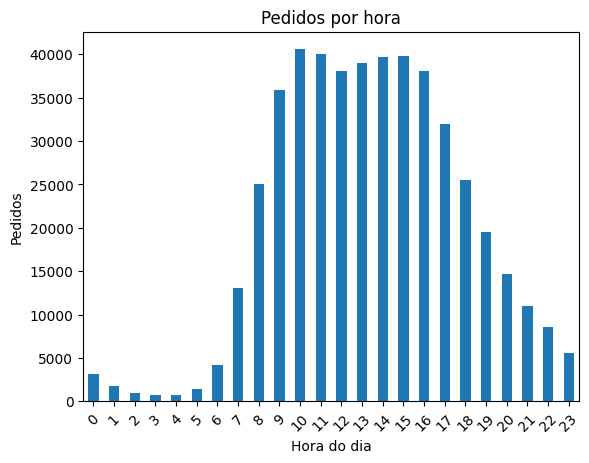

In [58]:
# Gráfico com os pedidos por hora do dia

orders_per_hour = df_orders.groupby('order_hour_of_day')['user_id'].count()

orders_per_hour.plot(kind='bar', title='Pedidos por hora', xlabel='Hora do dia', ylabel='Pedidos', rot= 45)




Das 09h às 16h ocorrem a maioria dos pedidos.

### Em que dia da semana as pessoas fazem compras?

<Axes: title={'center': 'Pedidos por dia da semana'}, xlabel='Dia da semana', ylabel='Pedidos'>

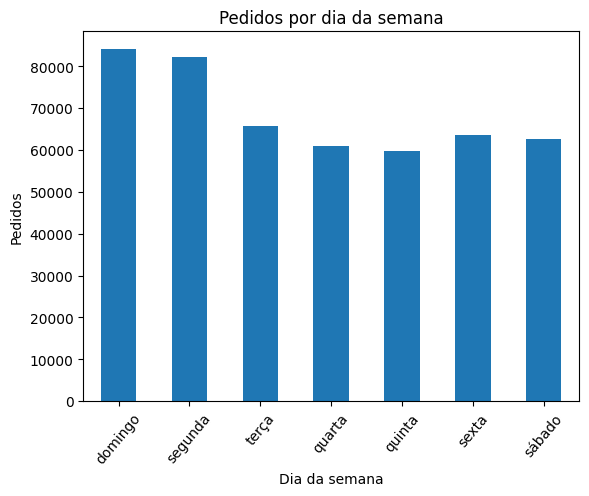

In [57]:
# Pedidos por dia da semana

days_of_week = {0: 'domingo', 1: 'segunda', 2 : 'terça', 3 : 'quarta', 4 : 'quinta', 5 : 'sexta', 6 : 'sábado'}

df_orders['order_dow'] = df_orders['order_dow'].replace(days_of_week)

orders_per_day = df_orders.groupby('order_dow')['user_id'].count()

days_order = ['domingo', 'segunda', 'terça', 'quarta', 'quinta', 'sexta', 'sábado']

orders_per_day = orders_per_day.reindex(days_order)

orders_per_day.plot(kind='bar', title='Pedidos por dia da semana', xlabel='Dia da semana', ylabel='Pedidos', rot= 50)




Domingo e segunda concentram mais pedidos.

### Quanto tempo as pessoas esperam até fazer outro pedido?

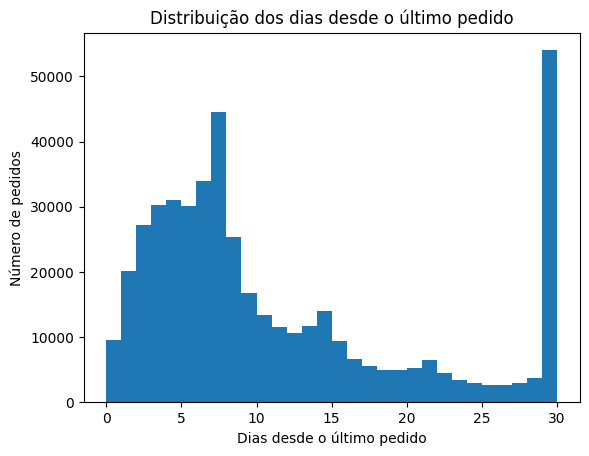

In [59]:
# Intervalo entre pedidos

plt.hist(df_orders['days_since_prior_order'], bins=30)

plt.title('Distribuição dos dias desde o último pedido')
plt.xlabel('Dias desde o último pedido')
plt.ylabel('Número de pedidos')

plt.show()

Há um padrão de frequência de pedidos semanais e mensais.

### Diferenças nas quartas e sábados em `'order_hour_of_day'`.

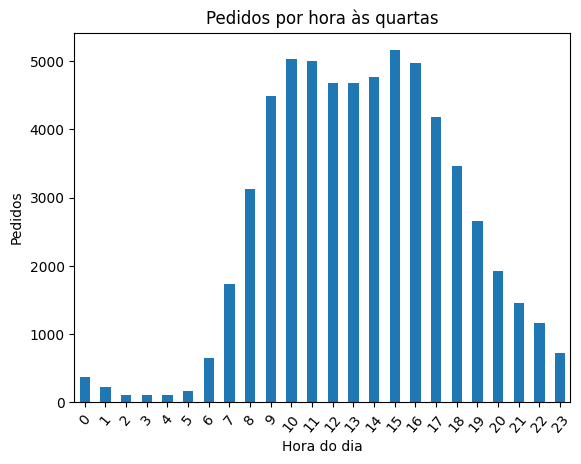

In [62]:
# Pedidos por hora às quarta-feiras

df_orders_wed = df_orders[df_orders['order_dow'] == 'quarta']

orders_wed = df_orders_wed.groupby('order_hour_of_day')['user_id'].count()

orders_wed.plot(kind='bar',
                              title='Pedidos por hora às quartas',
                              xlabel='Hora do dia',
                              ylabel='Pedidos',
                              rot=50)

plt.show()

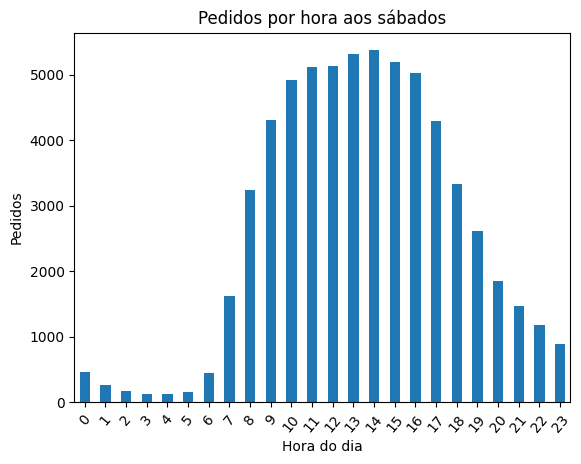

In [63]:
# Pedidos por hora aos sábados

df_orders_sat = df_orders[df_orders['order_dow'] == 'sábado']

orders_sat = df_orders_sat.groupby('order_hour_of_day')['user_id'].count()

orders_sat.plot(kind='bar',
                              title='Pedidos por hora aos sábados',
                              xlabel='Hora do dia',
                              ylabel='Pedidos',
                              rot=50)

plt.show()

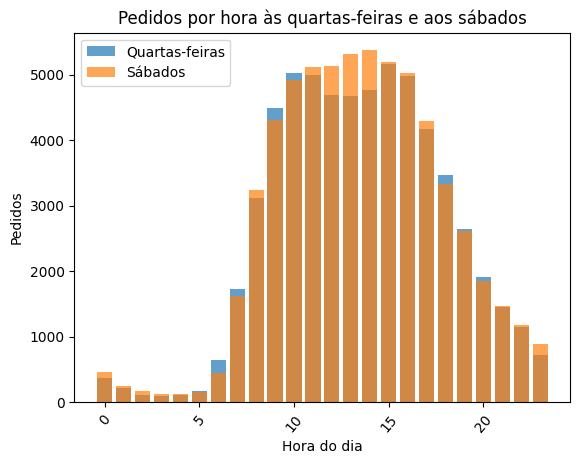

In [64]:
# Comparação dos gráficos anteriores

df_orders_wed = df_orders[df_orders['order_dow'] == 'quarta']

orders_wed = df_orders_wed.groupby('order_hour_of_day')['user_id'].count()

df_orders_sat = df_orders[df_orders['order_dow'] == 'sábado']

orders_sat = df_orders_sat.groupby('order_hour_of_day')['user_id'].count()

plt.bar(orders_wed.index, orders_wed.values, label='Quartas-feiras', alpha=0.7)

# Plotar os pedidos aos sábados
plt.bar(orders_sat.index, orders_sat.values, label='Sábados', alpha=0.7)

plt.title('Pedidos por hora às quartas-feiras e aos sábados')
plt.xlabel('Hora do dia')
plt.ylabel('Pedidos')
plt.xticks(rotation=50)
plt.legend()

plt.show()

>A quantidade de pedidos tem uma distribuição ao longo do dia muito parecida entre quarta e sábado, mas sábado tem mais pedidos perto do meio dia.

###  Qual é a distribuição do número de pedidos por cliente?

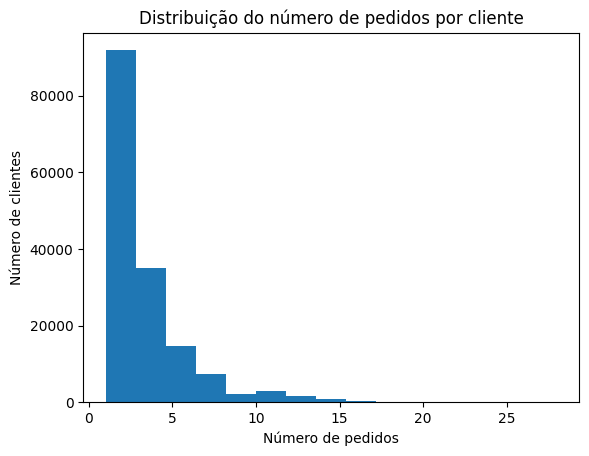

In [65]:
# Verificando quantos pedidos os clientes fazem


orders_per_client = df_orders.groupby('user_id')['order_number'].count()


plt.hist(orders_per_client, bins=15)
plt.title('Distribuição do número de pedidos por cliente')
plt.xlabel('Número de pedidos')
plt.ylabel('Número de clientes')
plt.show()

>Aproximadamente 1/5 dos clientes que fizeram compra pela primeira vez, chegaram a uma terceira compra. Quarta compra em diante cai ainda mais a recorrência.

### Quais são os 20 produtos mais populares?

In [66]:
# Verificando os produtos mais comprados

popular_products = df_order_products['product_id'].value_counts()

top_20_products = popular_products.head(20).index

df_20_products = df_products[df_products['product_id'].isin(top_20_products)]

print(df_20_products)

       product_id              product_name  aisle_id  department_id
5875         5876             organic lemon        24              4
8276         8277  apple honeycrisp organic        24              4
13175       13176    bag of organic bananas        24              4
16796       16797              strawberries        24              4
21136       21137      organic strawberries        24              4
21902       21903      organic baby spinach       123              4
22934       22935      organic yellow onion        83              4
24851       24852                    banana        24              4
24963       24964            organic garlic        83              4
26208       26209                     limes        24              4
27844       27845        organic whole milk        84             16
27965       27966       organic raspberries       123              4
28203       28204        organic fuji apple        24              4
39274       39275       organic bl

>Esses são os 20 itens mais pedidos, a grande maioria do departamento 4 e orgânicos.

### Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [68]:
# Média de produtos por pedido

products_per_order = df_order_products.groupby(by='order_id')['product_id'].count()

avg_products_per_order = products_per_order.mean()

print(avg_products_per_order)

10.098983215049127


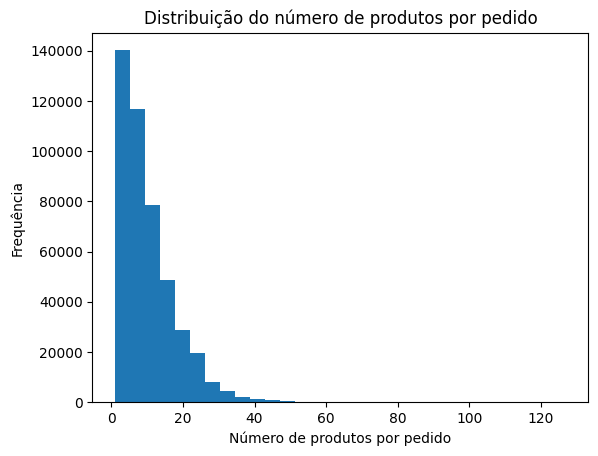

In [69]:
# Distribuição de quantidade de itens por pedido

plt.hist(products_per_order, bins=30)
plt.title('Distribuição do número de produtos por pedido')
plt.xlabel('Número de produtos por pedido')
plt.ylabel('Frequência')
plt.show()

>A média de itens por pedidos é 10.09. Pouquíssimos pedidos acima de 40 itens.

### Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

In [70]:
# Produtos selecionados por primeiro

first_products = df_order_products.groupby('product_id').mean()

first_20_products = first_products.sort_values(by='add_to_cart_order', ascending = True)

print(first_20_products.head(20))

             order_id  add_to_cart_order  reordered
product_id                                         
23940        237354.0                1.0        0.0
25973       1021500.0                1.0        1.0
46571       2401419.0                1.0        0.0
3165        3158388.0                1.0        0.0
17274       2729690.0                1.0        0.0
18833       2161544.0                1.0        0.0
27409       2332844.0                1.0        0.0
13279        479333.0                1.0        0.0
42597       2283360.0                1.0        0.0
24172       1399102.0                1.0        0.0
8019        2708608.0                1.0        0.0
5066        2674593.0                1.0        1.0
9873        3121159.0                1.0        0.0
42628        598921.0                1.0        0.0
11051       3295067.0                1.0        0.0
36720       1071518.0                1.0        0.0
24252        891116.0                1.0        0.0
8973        

In [71]:
# Adicionando informação do nome dos produtos

merge_product_name = pd.merge(first_20_products, df_products, on= 'product_id')

print(merge_product_name.head(20))

    product_id   order_id  add_to_cart_order  reordered  \
0        23940   237354.0                1.0        0.0   
1        25973  1021500.0                1.0        1.0   
2        46571  2401419.0                1.0        0.0   
3         3165  3158388.0                1.0        0.0   
4        17274  2729690.0                1.0        0.0   
5        18833  2161544.0                1.0        0.0   
6        27409  2332844.0                1.0        0.0   
7        13279   479333.0                1.0        0.0   
8        42597  2283360.0                1.0        0.0   
9        24172  1399102.0                1.0        0.0   
10        8019  2708608.0                1.0        0.0   
11        5066  2674593.0                1.0        1.0   
12        9873  3121159.0                1.0        0.0   
13       42628   598921.0                1.0        0.0   
14       11051  3295067.0                1.0        0.0   
15       36720  1071518.0                1.0        0.0 

>Esses são os 20 produtos recorrentemente adicionados por primeiro nos pedidos.

# Conclusão geral do projeto:

>Com as informações levantadas é possível traçar planejamentos de vendas e marketing mais acertados, tendo em vista que vimos aqui produtos populares, produtos preferidos, padrões de dias e horas em que ocorrem os pedidos, frequência de pedidos.